In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/Fraud.csv")

Exploring General info about the data


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Exploring The Relationship Between The Type Of Transaction and the Fraud

In [8]:
df_fraudulent = df[(df['isFraud'] == 1)].copy()
df_fraudulent

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

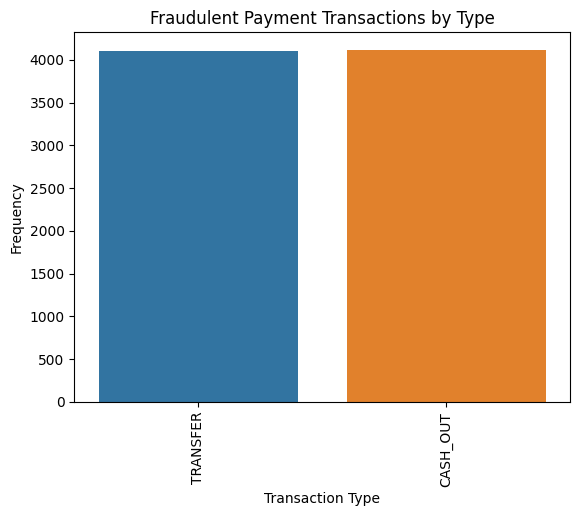

In [9]:
sns.countplot(data=df_fraudulent, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Fraudulent Payment Transactions by Type')
plt.xticks(rotation=90)
plt.show()

C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

<Axes: xlabel='isFraud', ylabel='type'>

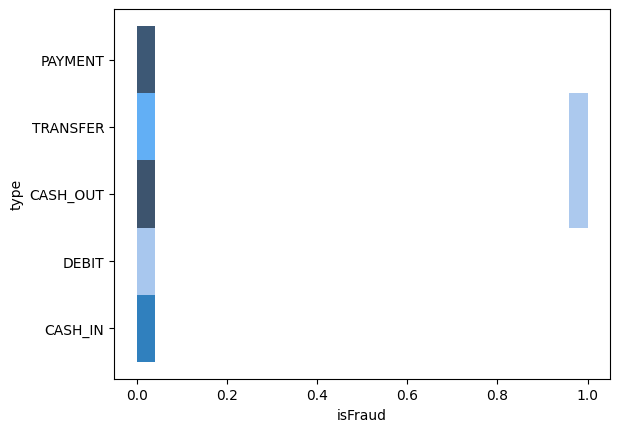

In [10]:
sns.histplot(data=df , x='isFraud' , y='type')

C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

<Axes: xlabel='isFraud', ylabel='type'>

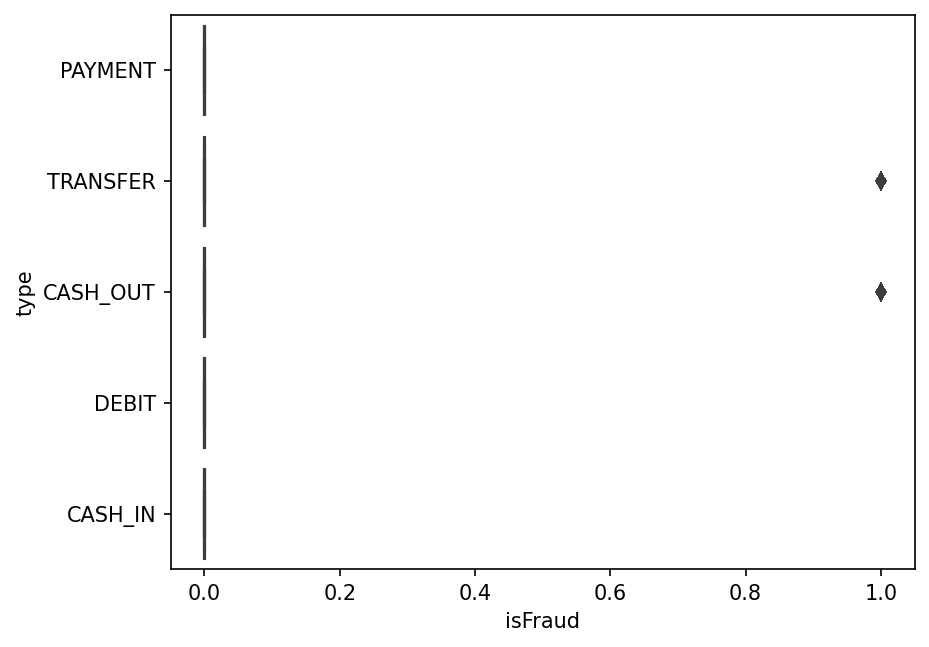

In [11]:
plt.figure(dpi=150)
sns.boxplot(x='isFraud' , y= 'type', data=df)

Exploring the Relationship Between the Step and isFraud

C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

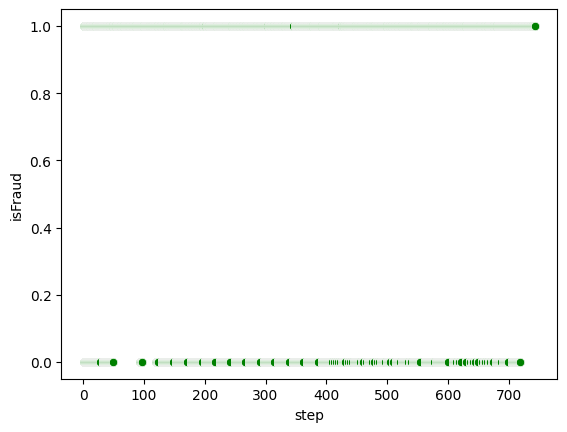

In [12]:
sns.scatterplot(data=df ,x='step',y='isFraud',color='green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

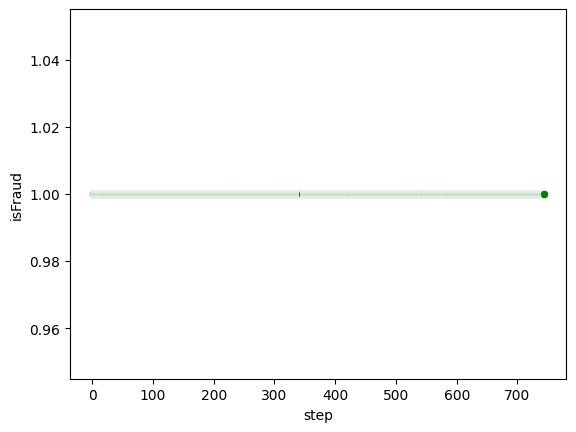

In [15]:
sns.scatterplot(data=df_fraudulent ,x='step',y='isFraud',color='green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

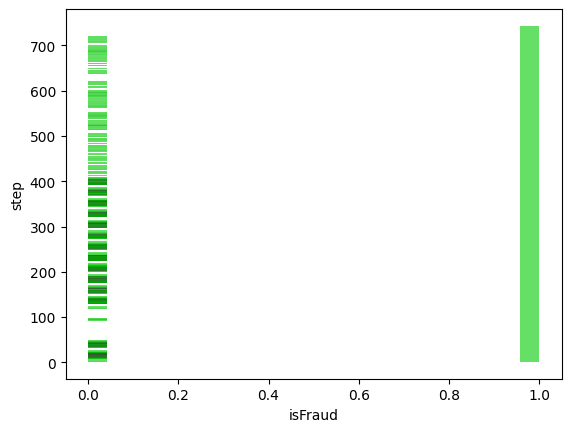

In [16]:
sns.histplot(data=df ,x='isFraud' , y='step',color='green',bins='auto')
plt.show

Exploring Relationship between Amount and isFraud


C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

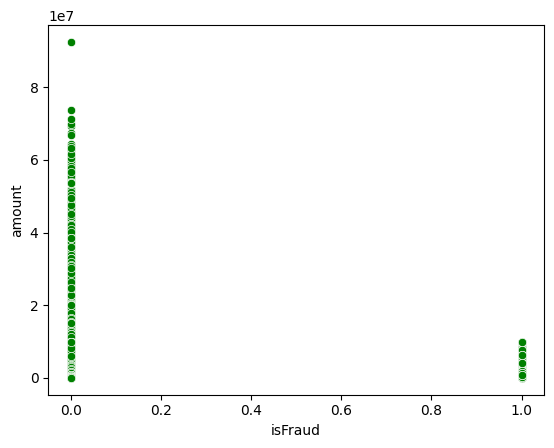

In [13]:
sns.scatterplot(data=df ,x='isFraud',y='amount',color='green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

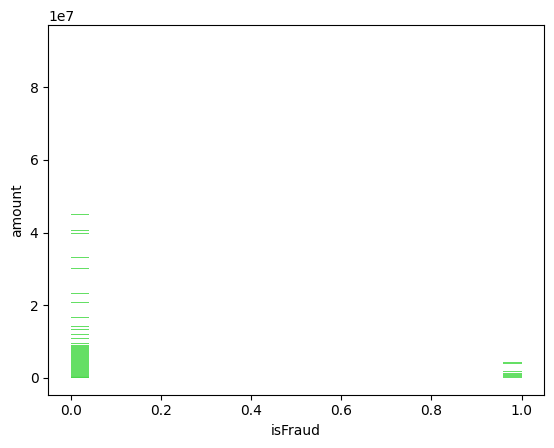

In [18]:
sns.histplot(data=df ,x='isFraud' , y='amount',color='green',bins='auto')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

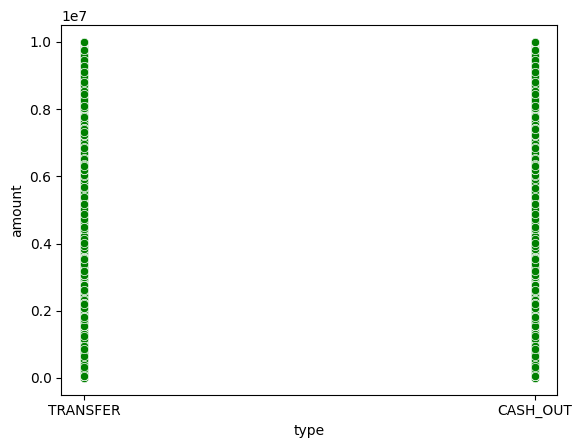

In [19]:
sns.scatterplot(data=df_fraudulent ,x='type',y='amount',color='green')
plt.show

General Plots

<Axes: xlabel='isFraud', ylabel='count'>

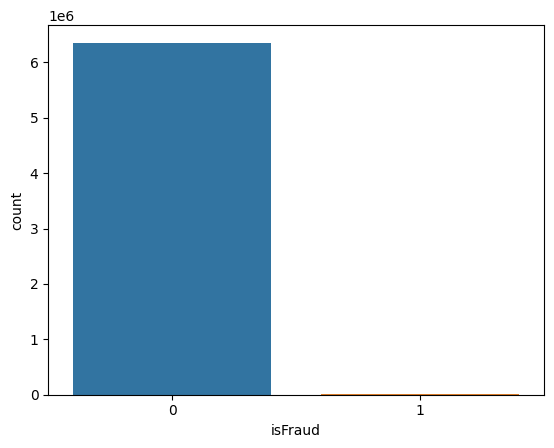

In [20]:
sns.countplot(data=df , x='isFraud' )

<Axes: xlabel='isFraud', ylabel='amount'>

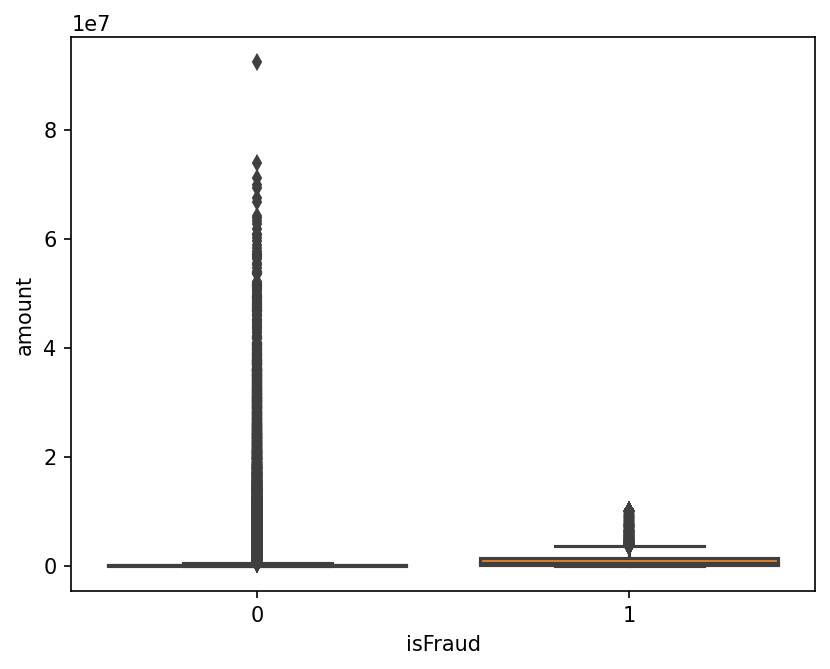

In [21]:
plt.figure(dpi=150)
sns.boxplot(x=df['isFraud'] , y=df['amount'] , data=df)

<Axes: xlabel='isFraud', ylabel='step'>

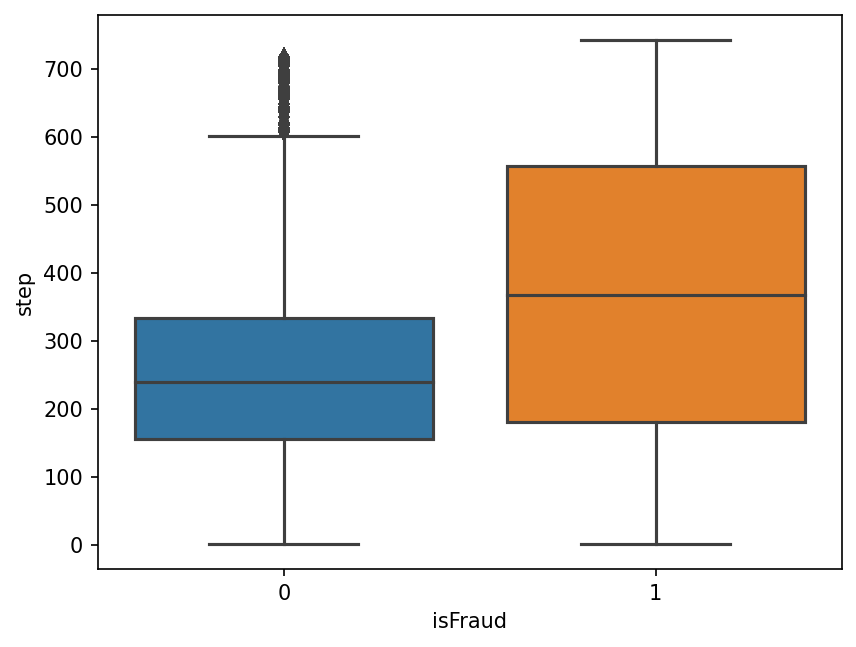

In [22]:
plt.figure(dpi=150)
sns.boxplot(x=df['isFraud'] , y=df['step'] , data=df)

In [11]:
print("Class distribution:\n", df['type'].value_counts())

Class distribution:
 type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Data Engineering And Preparation

In [11]:
#Transforming type from categorical variables to numerical before going further
type_mapping = {
    'PAYMENT': 1,
    'CASH_OUT': 2,
    'CASH_IN': 3,
    'TRANSFER': 4,
    'DEBIT' : 5
}

df['type'] = df['type'].map(type_mapping)

In [13]:
# Class distribution (so to check if the data is imbalanced here I choose the isFraud count of 0 and not fraud count of 1)
print("Class distribution:\n", df['isFraud'].value_counts())

Class distribution:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [13]:
#dropping nameOrigin and nameDestination because they are not important 
df = df.drop(['nameOrig', 'nameDest'], axis=1)

KeyError: "['nameOrig', 'nameDest'] not found in axis"

In [14]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,2,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,2,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


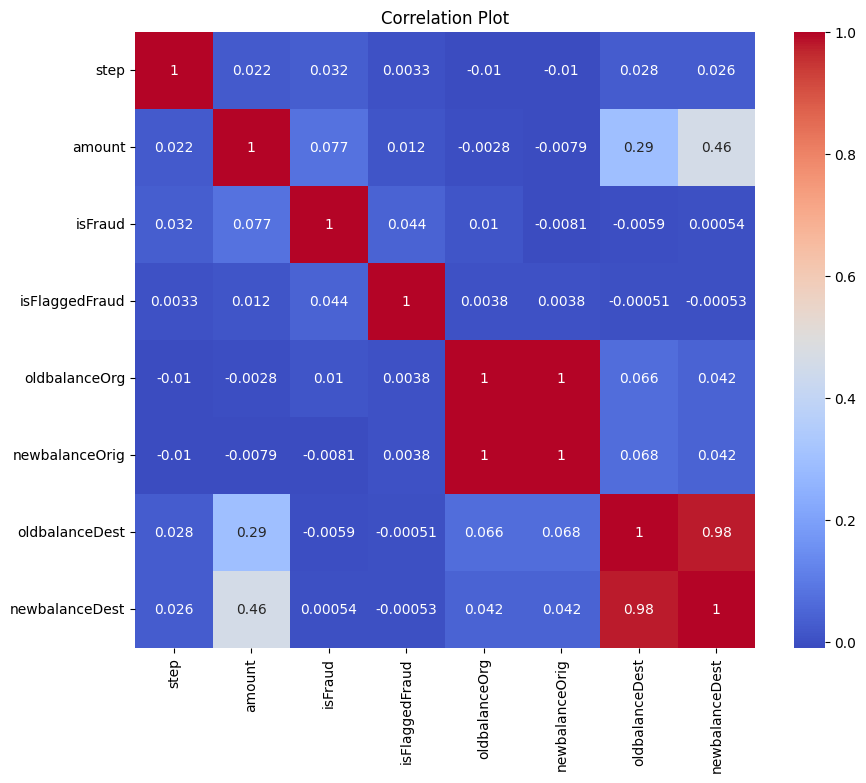

In [28]:
# Select the independent variables of interest
ind_col= ['step','amount', 'isFraud','isFlaggedFraud','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Create a correlation matrix
corr_matrix = df[ind_col].corr()

# Generate a correlation plot (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')

# Set plot title
plt.title('Correlation Plot')

# Display the plot
plt.show()

Split the Data into 2 classes 

First : Legitimate transactions --> named Legit

Second : Fraudulent transactions --> named fraud

In [15]:
legit = df[df.isFraud == 0]

fraud = df[df.isFraud ==1]

In [16]:
legit

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,0.00,0.00,0,0
1,1,1,1864.28,21249.0,19384.72,0.00,0.00,0,0
4,1,1,11668.14,41554.0,29885.86,0.00,0.00,0,0
5,1,1,7817.71,53860.0,46042.29,0.00,0.00,0,0
6,1,1,7107.77,183195.0,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362319,718,1,8634.29,518802.0,510167.71,0.00,0.00,0,0
6362320,718,2,159188.22,3859.0,0.00,0.00,159188.22,0,0
6362321,718,2,186273.84,168046.0,0.00,24893.67,211167.51,0,0
6362322,718,4,82096.45,13492.0,0.00,0.00,82096.45,0,0


In [17]:
fraud

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,4,181.00,181.00,0.0,0.00,0.00,1,0
3,1,2,181.00,181.00,0.0,21182.00,0.00,1,0
251,1,4,2806.00,2806.00,0.0,0.00,0.00,1,0
252,1,2,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,1,4,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,2,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.0,0.00,0.00,1,0


In [18]:
#shape of the legit data
legit.shape

(6354407, 9)

In [19]:
#shape of the fraud data
fraud.shape

(8213, 9)

In [20]:
# statistical measures of the legit data
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [21]:
# statistical measures of the fraud data
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [28]:
# compare the values for both transactions types
df.groupby('isFraud').mean()

Dealing with High Imbalanced Data 

Under-Sampling Method

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [22]:
#take 492 legit (non-fraudulent) transactions

legit_transactions = legit.sample(n=8213)

In [23]:
#concatenating the legit_transactions and the fraud DataFrames

new_transactions = pd.concat([legit_transactions, fraud], axis=0)
new_transactions

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4679342,331,2,150567.84,0.00,0.00,186236.19,336804.04,0,0
6186827,569,1,4414.47,223373.83,218959.36,0.00,0.00,0,0
510312,20,1,5165.90,11036.00,5870.10,0.00,0.00,0,0
5520747,380,1,10577.38,0.00,0.00,0.00,0.00,0,0
2059668,181,1,15977.49,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,2,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [24]:
new_transactions.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4679342,331,2,150567.84,0.00,0.00,186236.19,336804.04,0,0
6186827,569,1,4414.47,223373.83,218959.36,0.00,0.00,0,0
510312,20,1,5165.90,11036.00,5870.10,0.00,0.00,0,0
5520747,380,1,10577.38,0.00,0.00,0.00,0.00,0,0
2059668,181,1,15977.49,0.00,0.00,0.00,0.00,0,0


In [25]:
#count fraud and no fraud
new_transactions['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [26]:
# compare the values for both transactions types
new_transactions.groupby('isFraud').mean()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,
0,243.406185,2.064654,1.715114e+05,8.540970e+05,876555.473415,1.098681e+06,1.209032e+06,0.000000
1,368.413856,2.997687,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


Splitting the Data and Preparing it for Training 

In [27]:
#Splitting the data into Features(X's) & Targets(Y)

X = new_transactions.drop(columns='isFraud',axis=1)
y = new_transactions['isFraud']

In [28]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
4679342,331,2,150567.84,0.00,0.00,186236.19,336804.04,0
6186827,569,1,4414.47,223373.83,218959.36,0.00,0.00,0
510312,20,1,5165.90,11036.00,5870.10,0.00,0.00,0
5520747,380,1,10577.38,0.00,0.00,0.00,0.00,0
2059668,181,1,15977.49,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,2,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,0


In [29]:
y

4679342    0
6186827    0
510312     0
5520747    0
2059668    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: int64

In [30]:
#Splitting the data into Training data & Testing Data

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=101)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(16426, 8) (11498, 8) (4928, 8)


Logistic Model Training 

In [32]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()



In [33]:
logistic_model.fit(X_train , y_train)

LogisticRegression()

In [34]:
#beta coefficients
logistic_model.coef_

array([[-2.31010274e-03, -1.17530504e-05,  1.66021850e-06,
         2.67894433e-05, -2.80904257e-05,  1.25983714e-05,
        -1.26329087e-05,  1.02319701e-07]])

In [35]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [36]:
logistic_model.predict(X_test)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

Model Evaluation and Metrics

In [37]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,PrecisionRecallDisplay

# accuracy on training data
Y_train_prediction = logistic_model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, Y_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9017220386154113


In [38]:
y_prediction = logistic_model.predict(X_test)

In [39]:
y_prediction

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [40]:
accuracy_score(y_test,y_prediction)

0.8944805194805194

In [41]:
cm = confusion_matrix(y_test , y_prediction)
cm



array([[2244,  240],
       [ 280, 2164]], dtype=int64)

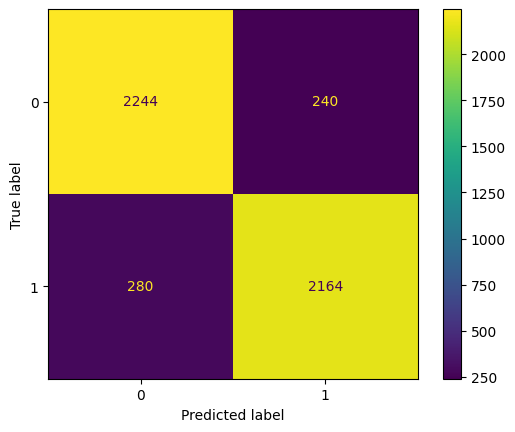

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.show()

In [43]:
print(classification_report(y_test , y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2484
           1       0.90      0.89      0.89      2444

    accuracy                           0.89      4928
   macro avg       0.89      0.89      0.89      4928
weighted avg       0.89      0.89      0.89      4928



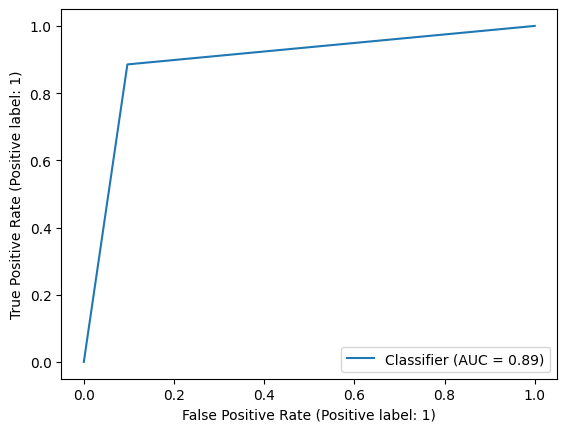

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
   y_test, y_prediction)

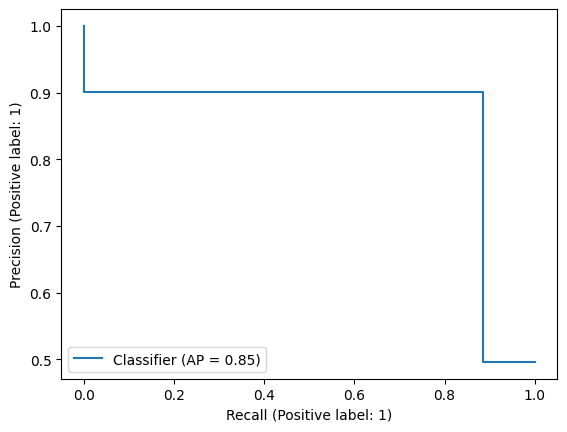

In [45]:
PrecisionRecallDisplay.from_predictions(
   y_test, y_prediction)

In [55]:
#simple data testing

transactions = pd.DataFrame({
    'step': 1,
    'type': 2,
    'amount': 800,
    'oldbalanceOrg': 2300,
    'newbalanceOrig': 1500,
    'oldbalanceDest': 0, 
    'newbalanceDest':1500,
    'isFlaggedFraud':0
     
},index=[0])

predicted_input = logistic_model.predict(transactions)
predicted_input

array([0], dtype=int64)